In [1]:
# load important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mutual_info_score
from sklearn.pipeline import make_pipeline

!pip install tqdm
from tqdm.auto import tqdm

import pickle

In [2]:
# Read the data from the csv file into a dataframe
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.shape

(4269, 13)

In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
# Edit column names to remove the spaces before the column names

df.columns = df.columns.str.lower().str.replace(' ','')

In [6]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [7]:
# Check for missing values

df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [8]:
# check the data types in the data frame
df.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [9]:
# loan_id is redundant and can be deleted
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [10]:
# loan_id is a redudntant column so we can delete it

del df['loan_id']


In [11]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [12]:
# Get the names of the numerical features and the categorical features

categorical = list(df.dtypes[df.dtypes=='object'].index)
categorical

['education', 'self_employed', 'loan_status']

In [13]:
numerical = list(df.dtypes[df.dtypes!='object'].index)
numerical

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [14]:
# Examine the values of the categorical

for value in categorical:
    print(df[value].value_counts().index)

Index([' Graduate', ' Not Graduate'], dtype='object', name='education')
Index([' Yes', ' No'], dtype='object', name='self_employed')
Index([' Approved', ' Rejected'], dtype='object', name='loan_status')


In [15]:
# First remove the spaces in 'Not Graduate'
df['education'] = df['education'].str.replace(' Not ', ' Not_')
df['education'].head()

0         Graduate
1     Not_Graduate
2         Graduate
3         Graduate
4     Not_Graduate
Name: education, dtype: object

In [16]:
# Continue editing the values of the categorical to remove the remaining extra spaces
for value in categorical:
    df[value] = df[value].str.lower().str.replace(' ','')

for value in categorical:
    print(df[value].value_counts().index)

Index(['graduate', 'not_graduate'], dtype='object', name='education')
Index(['yes', 'no'], dtype='object', name='self_employed')
Index(['approved', 'rejected'], dtype='object', name='loan_status')


In [17]:
# Examine the unique values of the categoricals

df[categorical].nunique()

education        2
self_employed    2
loan_status      2
dtype: int64

In [18]:
# We can examine the numerical columns (i.e. features)

df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [19]:
# Convert the target variable to numerical

df['loan_status'] = (df['loan_status'] == 'approved').astype(int)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,graduate,no,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,not_graduate,yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,graduate,no,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,graduate,no,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,not_graduate,yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [20]:
# Update the new categorical variables to exclude the target variable
categorical = categorical[:-1]
categorical

['education', 'self_employed']

<Axes: xlabel='loan_amount', ylabel='Count'>

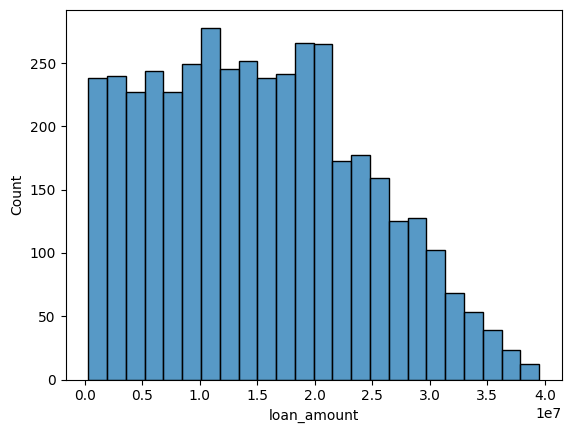

In [21]:
# Plot the histogram of the features to see their distribution
sns.histplot(df.loan_amount)

In [22]:
# Try to normalize the distribution if not normalized

In [23]:
# Split the data into train, validation and test sets (60%, 20%, 20%)

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)


In [24]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, shuffle=False)

In [25]:
len(df_train) + len(df_val) + len(df_test) == len(df)

True

In [26]:
# Retreive the values of the target variable
y_full_train = df_full_train.loan_status.values
y_train = df_train.loan_status.values
y_val = df_val.loan_status.values
y_test = df_test.loan_status.values

In [27]:
len(y_train) + len(y_val) + len(y_test) == len(df)

True

In [28]:
# Compute feature importance (mutual information for categorical features)
def mutual_info_loan_status_score(series):
    return mutual_info_score(series, df_full_train.loan_status)

mi = df_full_train[categorical].apply(mutual_info_loan_status_score)

mi.sort_values(ascending=False)

mi


education        0.000060
self_employed    0.000009
dtype: float64

In [29]:
# Compute feature importance (correlation information for numerical features)
# Correlation matrix for the numerial variables

corr_matrix = np.zeros([len(numerical),len(numerical)])
i = 0
for col in numerical:
    corr_matrix[i,:] = df_full_train[numerical].corrwith(df_full_train[col]).abs()
    i = i+1
corr_matrix.round(3)

array([[1.   , 0.011, 0.003, 0.004, 0.009, 0.012, 0.005, 0.009, 0.02 ],
       [0.011, 1.   , 0.929, 0.003, 0.013, 0.63 , 0.64 , 0.928, 0.853],
       [0.003, 0.929, 1.   , 0.   , 0.008, 0.594, 0.598, 0.862, 0.791],
       [0.004, 0.003, 0.   , 1.   , 0.006, 0.003, 0.005, 0.001, 0.005],
       [0.009, 0.013, 0.008, 0.006, 1.   , 0.019, 0.008, 0.021, 0.012],
       [0.012, 0.63 , 0.594, 0.003, 0.019, 1.   , 0.421, 0.582, 0.527],
       [0.005, 0.64 , 0.598, 0.005, 0.008, 0.421, 1.   , 0.588, 0.553],
       [0.009, 0.928, 0.862, 0.001, 0.021, 0.582, 0.588, 1.   , 0.791],
       [0.02 , 0.853, 0.791, 0.005, 0.012, 0.527, 0.553, 0.791, 1.   ]])

In [30]:
numerical

['no_of_dependents',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value']

In [31]:
# Compute the correlation matrix to see the dependence of the numberical features on the target variable
df_full_train[numerical].corrwith(df_full_train['loan_status']).abs().sort_values(ascending=False)

cibil_score                 0.771858
loan_term                   0.113112
loan_amount                 0.020522
residential_assets_value    0.019803
no_of_dependents            0.016512
commercial_assets_value     0.013950
luxury_assets_value         0.013616
income_annum                0.009410
bank_asset_value            0.001711
dtype: float64

In [32]:
# Delete the target variable from the dataframes
#del df_full_train['loan_status']
del df_train['loan_status']
del df_val['loan_status']
del df_test['loan_status']

In [33]:
# Training the model
# One-hot encoding
dv = DictVectorizer(sparse=False)

In [34]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
X_train.shape

(2561, 13)

In [35]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
X_val.shape

(854, 13)

In [36]:
test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)
X_test.shape

(854, 13)

In [37]:
# MODEL TRAINING
### Logistic Regression classifier

model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000) # solver=’lbfgs’, solver='liblinear'
# solver='lbfgs' produces a better roc_auc_score and accuracy than solver='liblinear'
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
#model.intercept_, model.coef_

In [39]:
y_pred = model.predict_proba(X_val)[:,1]
#y_pred

In [40]:
round(roc_auc_score(y_val, y_pred),2)

0.89

In [41]:
# Computing the model accuracy for a given threshold value
loan_decision = y_pred>=0.5
(y_val == loan_decision).mean()  

np.float64(0.8009367681498829)

In [42]:
# RMSE
def rmse(y_val, y_pred):
    square_error = (y_val - y_pred)**2
    MSE = np.mean(square_error)
    return np.sqrt(MSE)

In [43]:
rmse_score = rmse(y_val, y_pred)
rmse_score

np.float64(0.3776729553540403)

In [44]:
# Calculating precision and recall for varying threshold values from 0 to 1 with incremental step of 0.01
scores = []
np.seterr(divide='ignore', invalid='ignore') # to allow division by zero
thresholds = np.linspace(0,1,101)
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    #print(tp, tn, fp, fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    fpr = fp / (fp + tn)
    f1 = (2 * precision * recall) / (precision + recall)

    scores.append((t, tp, tn, fp, fn, precision, recall, fpr, f1))
    

In [45]:
# Creating a dataframe to show metrics
columns = ['threshold', 'tp', 'tn','fp','fn','precision','recall','fpr', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)

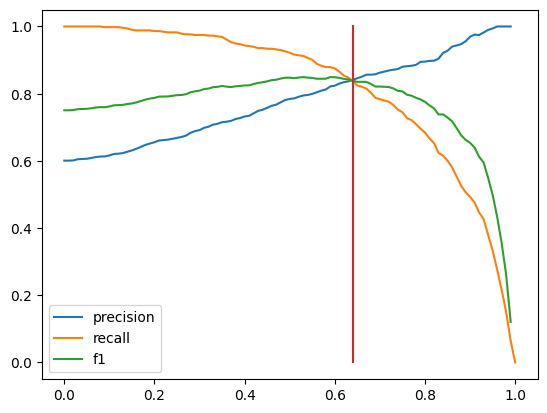

In [46]:
# Visualising the results
plt.plot(thresholds, df_scores.precision, label='precision')
plt.plot(thresholds, df_scores.recall, label='recall')
plt.plot(thresholds, df_scores.f1, label='f1')
plt.legend()
plt.plot([0.64,0.64], [0, 1])

In [47]:
# To look in the values of threshold where precision and recall are equal
#df_scores.loc[50:80]

In [48]:
# KFold cross-validation
# To obtain better model roc_auc_score

n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.loan_status.values
    y_val = df_val.loan_status.values
    
    # Training the model
    # One-hot encoding
    dv = DictVectorizer(sparse=False)
    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:,1]

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.4f, +- %.4f' % (np.mean(scores), np.std(scores)))

0it [00:00, ?it/s]

0.8818, +- 0.0097


In [49]:
# Hyperparameter tuning of Logistic Regression classifier with K-fold cross-validation

#C = [0.000001, 0.001, 1, 5, 10, 50, 100]

n_splits = 5

for C in tqdm([0.000001, 0.001, 1, 5, 10, 50, 100]):
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.loan_status.values
        y_val = df_val.loan_status.values

        del df_train['loan_status']
        del df_val['loan_status']
        
        # Training the model
        # One-hot encoding
        dv = DictVectorizer(sparse=False)
        train_dict = df_train.to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)
    
        val_dict = df_val.to_dict(orient='records')
        X_val = dv.transform(val_dict)
    
        model = LogisticRegression(solver='lbfgs', C=C, max_iter=1000)
        model.fit(X_train, y_train)
    
        y_pred = model.predict_proba(X_val)[:,1]
    
        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    
    print('C=%s %.3f, +- %.3f' % (C, round(np.mean(scores),3), round(np.std(scores),3)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=1e-06 0.816, +- 0.013
C=0.001 0.882, +- 0.010
C=1 0.880, +- 0.010
C=5 0.880, +- 0.010
C=10 0.885, +- 0.007
C=50 0.880, +- 0.010
C=100 0.882, +- 0.011


In [50]:
# C = 10, is the best parameter because it has the best possible mean score for in the worst case of the standard deviation

In [51]:
### Decision Tree Classifier

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

dt = DecisionTreeClassifier(max_depth=1, random_state=1) # max_depth=1 to be tuned later
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [52]:
y_pred = dt.predict_proba(X_val)[:,1]
#y_pred
roc_auc_score(y_val, y_pred)

0.9686286705115158

In [53]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- cibil_score <= 549.50
|   |--- class: 0
|--- cibil_score >  549.50
|   |--- class: 1



In [54]:
scores = []
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth = d, random_state=1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[ :, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (d, auc))
    score = rmse(y_val, y_pred)
    scores.append((d, score))


   1 -> 0.969
   2 -> 0.994
   3 -> 0.996
   4 -> 0.997
   5 -> 0.990
   6 -> 0.990
  10 -> 0.984
  15 -> 0.977
  20 -> 0.977
None -> 0.977


In [55]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'rmse'])
df_scores.rmse = np.round(df_scores.rmse, 3)
df_scores

,max_depth,rmse
0,1.0,0.189
1,2.0,0.151
2,3.0,0.149
3,4.0,0.138
4,5.0,0.147
5,6.0,0.141
6,10.0,0.145
7,15.0,0.158
8,20.0,0.148
9,NaN,0.148


In [56]:
# Best depth=4
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred = rf.predict_proba(X_val)[:,1]
#y_pred
roc_auc_score(y_val, y_pred)

0.992385691130461

In [58]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:,1]
    score = rmse(y_val, y_pred)
    scores.append((n, score))

In [59]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores.rmse = np.round(df_scores.rmse, 3)
df_scores

,n_estimators,rmse
0,10,0.167
1,20,0.152
2,30,0.146
3,40,0.146
4,50,0.147
5,60,0.144
6,70,0.143
7,80,0.142
8,90,0.142
9,100,0.143


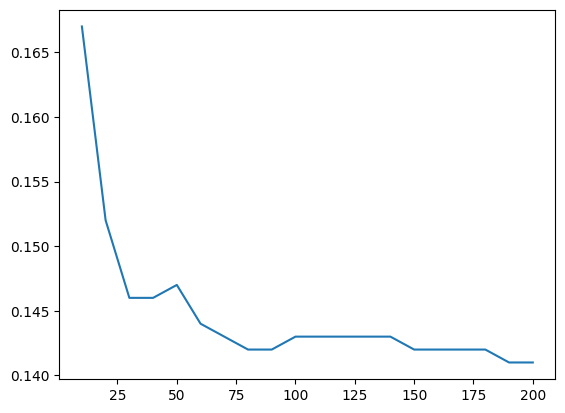

In [60]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [61]:
mean_scores = []
scores = []
for d in [4, 10, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        score = rmse(y_val, y_pred)
        scores.append(score)
    mean_scores.append((d, np.mean(scores)))
    scores=[]

In [62]:
df_mean_scores = pd.DataFrame(mean_scores, columns=['max_depth','mean_rmse'])
df_mean_scores

,max_depth,mean_rmse
0,4,0.190937
1,10,0.159432
2,20,0.163769


In [63]:
# Computing feature_importance_

rf = RandomForestClassifier(n_estimators=60, max_depth=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=dv.get_feature_names_out())

print(feat_importances.sort_values(ascending=False))

cibil_score                 0.815088
loan_term                   0.055428
loan_amount                 0.026827
income_annum                0.018866
commercial_assets_value     0.018393
luxury_assets_value         0.016943
residential_assets_value    0.016807
bank_asset_value            0.015921
no_of_dependents            0.007739
self_employed=yes           0.002213
education=graduate          0.002071
self_employed=no            0.001990
education=not_graduate      0.001713
dtype: float64


In [64]:
del df_full_train['loan_status']

In [65]:
# Final model
# Best model is the Decision Tree classifier with max_depth=4, resulting in roc_auc_score=0.997 and rmse=0.14

full_train_dict = df_full_train.to_dict(orient='records')
X_full_train = dv.fit_transform(full_train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

dt = DecisionTreeClassifier(max_depth = 4, random_state=1)
dt.fit(X_full_train, y_full_train)
y_pred = dt.predict_proba(X_test)[ :, 1]
auc = roc_auc_score(y_test, y_pred)
auc

0.9956540033315465

In [66]:
rmse(y_test, y_pred)

np.float64(0.1381645361056782)

In [67]:
pipeline = make_pipeline(
    DictVectorizer(),
    DecisionTreeClassifier(max_depth = 4, random_state=1)
)

pipeline.fit(full_train_dict, y_full_train)

,steps,"[('dictvectorizer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True
,criterion,'gini'
,splitter,'best'
,max_depth,4


In [68]:
y_pred = pipeline.predict_proba(test_dict)[:,1]

In [69]:
#y_pred

In [70]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9956540033315465

In [71]:
rmse(y_test, y_pred)

np.float64(0.1381645361056782)

In [13]:
# Restart Kernel and run code from here to test that the model saved correctly and can do correct predictions
import pickle

In [3]:
with open('model.bin', 'rb') as f_in:
    pipeline = pickle.load(f_in)

In [4]:
pipeline

,steps,"[('dictvectorizer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,True
,sort,True
,criterion,'gini'
,splitter,'best'
,max_depth,4


In [7]:
client = {
    'no_of_dependents': 2,
    'education': 'graduate',
    'self_employed': 'yes',
    'income_annum': 9400000,
    'loan_amount': 37300000,
    'loan_term': 14,
    'cibil_score': 383,
    'residential_assets_value': 7800000,
    'commercial_assets_value': 15900000,
    'luxury_assets_value': 27100000,
    'bank_asset_value': 7700000
 }

client_2 = {
    'no_of_dependents': 1,
    'education': 'not_graduate',
    'self_employed': 'yes',
    'income_annum': 7800000,
    'loan_amount': 22200000,
    'loan_term': 10,
    'cibil_score': 763,
    'residential_assets_value': 11200000,
    'commercial_assets_value': 1400000,
    'luxury_assets_value': 27000000,
    'bank_asset_value': 4900000
}
 

In [12]:
pipeline.predict_proba(client)[:,1]

array([0.])